## Observations and Insights 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display for preview

mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [130]:
# Check number of rows
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [131]:
# Check the number of mice and look for discrepencies

mouse_study['Mouse ID'].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [132]:
# Get all the data for the duplicate mouse ID and drop him/her from the database.  Mouse ID is now the index.

index_mouse_study = mouse_study.set_index('Mouse ID')
index_mouse_study.loc['g989']

mouse_study_clean = index_mouse_study.drop("g989")
mouse_study_clean.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [133]:

mouse_study_clean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [134]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_study = mouse_study_clean.groupby("Drug Regimen")

tumor_mean = drug_study["Tumor Volume (mm3)"].mean()
tumor_median = drug_study["Tumor Volume (mm3)"].median()
tumor_var = drug_study["Tumor Volume (mm3)"].var()
tumor_std = drug_study["Tumor Volume (mm3)"].std()
tumor_sem = drug_study["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_var,
                              "Standard Deviation": tumor_std,
                              "Standard Error of the Mean": tumor_sem})

summary_stats



,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

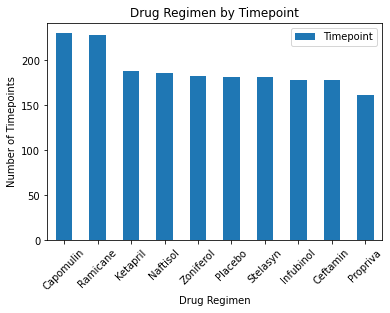

In [135]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_of_timepoints = mouse_study['Drug Regimen'].value_counts()

drug_study_one = pd.DataFrame({'Timepoint': number_of_timepoints})

# Chart the data, give it a title, and label the axes
drug_chart = drug_study_one.plot(kind="bar", title="Drug Regimen by Timepoint",rot=45)
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Timepoints")



In [136]:
drug_study_one

,Timepoint
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


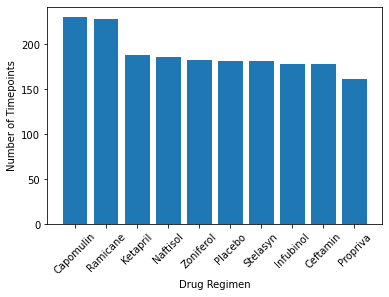

In [137]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using 
# Mathplotlib - pyplot.

x_axis = mouse_study_clean["Drug Regimen"].value_counts().index
y_axis = number_of_timepoints
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()


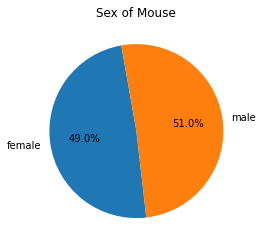

In [138]:
# Generate a pie plot showing the distribution of female and male mice using pyplot

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()
plt.pie(gender_study, labels=('female', 'male'), startangle=100, autopct='%1.1f%%')
plt.title("Sex of Mouse")
plt.show()


<AxesSubplot:title={'center':'Sex of Mouse'}, ylabel='Sex'>

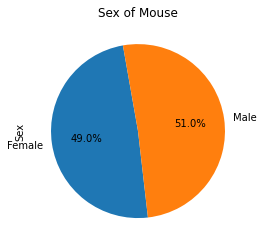

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_study = mouse_study_clean.groupby(['Sex'])['Sex'].count()

gender_study.plot.pie(title = "Sex of Mouse",startangle=100,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the top treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find the max timepoint for each mouse
max_time = mouse_study.groupby('Mouse ID')['Timepoint'].max()

# Reindex so that Mouse ID can be used later - the old index was messing up my loop.
max_time = max_time.reset_index()


In [141]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_time = pd.merge(max_time, mouse_study_clean, on=('Mouse ID', 'Timepoint'), how='left')


vol_time.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0


In [142]:
# Rename the timepoint column and tumor volume column, delete any unecessary columns and reorder.

vol_time = vol_time.rename(columns={"Timepoint": "Max Timepoint", "Tumor Volume (mm3)": "Final Tumor Volume"})
#del vol_time["Metastatic Sites"]

vol_time = vol_time[['Mouse ID','Sex', 'Age_months', 'Weight (g)', 'Drug Regimen', 'Max Timepoint', "Final Tumor Volume"]]

vol_time.head(10)



,Mouse ID,Sex,Age_months,Weight (g),Drug Regimen,Max Timepoint,Final Tumor Volume
0,a203,Female,20.0,23.0,Infubinol,45,67.973419
1,a251,Female,21.0,25.0,Infubinol,45,65.525743
2,a262,Female,17.0,29.0,Placebo,45,70.717621
3,a275,Female,20.0,28.0,Ceftamin,45,62.999356
4,a366,Female,16.0,29.0,Stelasyn,30,63.440686
5,a401,Female,8.0,25.0,Zoniferol,45,66.794156
6,a411,Male,3.0,22.0,Ramicane,45,38.407618
7,a444,Female,10.0,25.0,Ramicane,45,43.047543
8,a457,Female,11.0,30.0,Ketapril,10,49.783419
9,a492,Male,20.0,25.0,Stelasyn,45,60.122011


In [143]:
#vol_time.value_counts()

In [145]:
# Put treatments into a list for the for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data for each treatment.
treatment_vols = []

# Find each drug in the list
for treatment in treatments: 

    # Find the row that each treatment is in using loc, get the tumor volume and put it in the list
    vol_values = vol_time.loc[vol_time['Drug Regimen']== treatment, 'Final Tumor Volume']
    treatment_vols.append(vol_values)
    #print(treatment_vols) 
   
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = vol_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The IQR for the tumor volume for {treatment} is {iqr}')

    #Find upper and lower bounds to determine if there are any potential outliers.
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    

    # Look for outliers
    outliers_count = (vol_values.loc[(vol_time['Final Tumor Volume'] > upper_bound) | 
                                        (vol_time['Final Tumor Volume'] < lower_bound)]).count()
    print(f'{treatment} has {outliers_count} outlier(s).')
    print()  
        
     
    
    

The IQR for the tumor volume for Capomulin is 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Capomulin has 0 outlier(s).

The IQR for the tumor volume for Ramicane is 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Ramicane has 0 outlier(s).

The IQR for the tumor volume for Infubinol is 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Infubinol has 1 outlier(s).

The IQR for the tumor volume for Ceftamin is 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Ceftamin has 0 outlier(s).



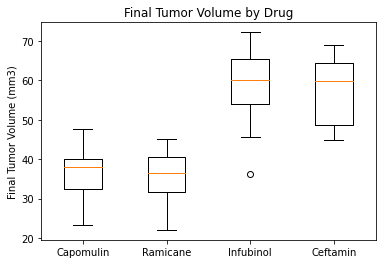

In [146]:
# Generate a box and whiskers plot of the final tumor volume of each mouse across four regimens of interest

# Plot box and whiskers 

plt.boxplot(treatment_vols)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

In [147]:
#Create new data frame for the Capomulin treatment.

capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
capomulin_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...
i557,Capomulin,Female,1,24,45,47.685963,1
r157,Capomulin,Male,22,25,0,45.000000,0
r157,Capomulin,Male,22,25,5,45.597064,0


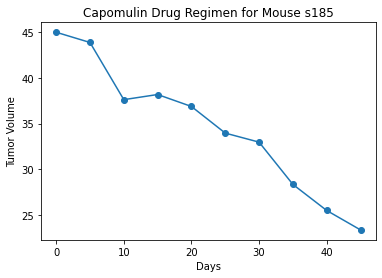

In [148]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# This data is for a 3 month old female mouse with ID s185


line_df = capomulin_df.loc['s185']

timepoint_cap = line_df['Timepoint']
tumor_cap = line_df["Tumor Volume (mm3)"]


values = [[0,50], [0,45]]

plt.plot(timepoint_cap,tumor_cap, marker = 'o')
plt.title("Capomulin Drug Regimen for Mouse s185")
plt.xlabel('Days')
plt.ylabel('Tumor Volume')

plt.show()



Text(0, 0.5, 'Tumor Volume (mm3)')

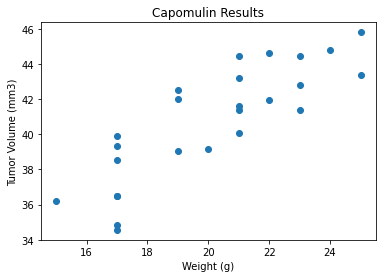

In [149]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculate the average volume for each drug.
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")




## Correlation and Regression

The correlation coefficient is 0.84
The regression equation is y = 0.95x + 21.55


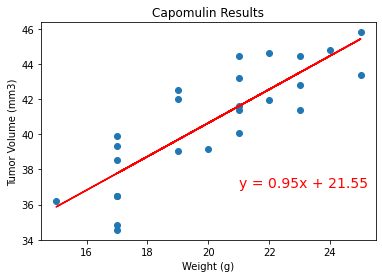

In [150]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept


correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="r")

plt.title("Capomulin Results")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(21,37),fontsize=14,color="red")
print(f"The regression equation is {line_eq}")


